## Lecture 1 -- Introduction and Review

First, let's install some of the packages that we will need during this course ...

Pixiedust is a Python helper library for Notebooks.  We need it to use the "pixie debugger"

In [ ]:
!pip install pixiedust

You also need to install the rise package to be able to view Notebooks as slideshows ..

In [ ]:
!conda install -c conda-forge rise

## Review

### Python

I'm going to assume that you're all pretty solid Python programmers.  I've included a "Python overview" notebook, which you should go through if you're nervous about your Python background.  It also includes an example using the pixie debugger -- I recommend walking through to try it out.

### Abstract Data Types

The text talks a lot about "abstract data types," but doesn't really offer much of a definition of what makes a data type "abstract."  I've included a paper from John Guttag of MIT about abstract data types that you should read.  From the paper,

> The notion of an abstract data type is quite simple. It is a set of objects
and the operations on those objects. The specification of those operations
defines an interface between the abstract data type and the rest of the
program. The interface defines the behavior of the operations – what they
do, but not how they do it. The specification thus defines an abstraction
barrier (Figure 1) that isolates the rest of the program from the data
structures, algorithms, and code involved in providing a realization of the
type abstraction.


#### Basic Idea ... Isolate Design Decision Implications

* Abstraction
    * Omitting or hiding low-level details
* Modularity
    * Dividing a system into components or modules, each of which are independent
* Encapsulation
    * Building walls around modules to ensure preservation of module integrity
* Information Hiding
    * Hiding details so they can be changed independently of rest of system
* Separation of Concerns
    * Making “feature” responsibility of single module, rather than spreading across many modules


#### Data Type operations

Generally divide into:
* Creators
    * $\large t^{*} \rightarrow T$
* Producers
    * $\large [T^{+}, t^{*}] \rightarrow T$
* Observers
    * $\large [T^{+}, t^{*}] \rightarrow t$
* Mutators
    * $\large [T^{+}, t^{*}] \rightarrow \{None, T, t\}$

#### Examples

* Integers
    * creators: numeric literals
	* producers: arithmetic operators (+,-,*, …)
	* observers: comparison operators (==, !=, <, >)
	* mutators: none

* Python Lists
    * creators: list constants, list comprehensions
	* producers: list comprehensions, copy, slicing
	* observers: index, count 
	* mutators: append, extend, insert, remove, pop, clear, sort, reverse

#### What Properties Should Operations Have?

* Minimal
	* Only define what’s needed
	* Prove the need for “convenience functions” before adding them
    
* Adequate
	* Every mutator should change the value of some observer
	* Different creator/producer arguments should change value of some observer


In [ ]:
# Here's a Python stack implementation using lists
# I've added typing information to make the specification a little tighter

from typing import Any, TypeVar, List

T = TypeVar('T')

class stack:
    def __init__(self):
        self.items: List[T] = []
            
    def push(self, val: T) -> None:
        self.items.append(val)
        
    def pop(self) -> T:
        return self.items.pop()
    
    def isEmpty(self) -> bool:
        return len(self.items) == 0

Only observer is `isEmpty`.  Note that we have the obvious truths ...

In [ ]:
s = stack()
s.push(10)
assert not s.isEmpty()
x = s.pop()
assert s.isEmpty() and x == 10

This may be minimal, but it isn't really adequate.  So the text adds:

In [ ]:
def size(self) -> int:
    return len(self.items)

def peek(self) -> T:
    return self.items[0]

stack.size = size
stack.peek = peek

In [ ]:
s.push(20)
assert s.peek() == 20

And we might want to add a `clear` mutator too ...

In [ ]:
def clear(self) -> None:
    self.items.clear()
    
stack.clear = clear

s.clear()
assert s.isEmpty()

### Algorithm Analysis

Some numbers you need to know ...

But first, a wonderful insight from Grace Hopper ....

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('JEpsKnWZrJ8', width=800, height=600)

### Latency numbers every programmer should know
    L1 cache reference ......................... 0.5 ns
    Branch mispredict ............................ 5 ns
    L2 cache reference ........................... 7 ns
    Mutex lock/unlock ........................... 25 ns
    Main memory reference ...................... 100 ns             
    Compress 1K bytes with Zippy ............. 3,000 ns  =   3 µs
    Send 2K bytes over 1 Gbps network ....... 20,000 ns  =  20 µs
    SSD random read ........................ 150,000 ns  = 150 µs
    Read 1 MB sequentially from memory ..... 250,000 ns  = 250 µs
    Round trip within same datacenter ...... 500,000 ns  = 0.5 ms
    Read 1 MB sequentially from SSD* ..... 1,000,000 ns  =   1 ms
    Disk seek ........................... 10,000,000 ns  =  10 ms
    Read 1 MB sequentially from disk .... 20,000,000 ns  =  20 ms
    Send packet CA->Netherlands->CA .... 150,000,000 ns  = 150 ms
    Human response time ................ 250,000,000 ns  = 250 ms

Assuming ~1GB/sec SSD

![Visual representation of latencies](http://i.imgur.com/k0t1e.png)

Visual chart provided by [ayshen](https://gist.github.com/ayshen)

Data by [Jeff Dean](http://research.google.com/people/jeff/)

Originally by [Peter Norvig](http://norvig.com/21-days.html#answers)

Lets multiply all these durations by a billion:

Magnitudes:

### Minute:
    L1 cache reference                  0.5 s         One heart beat (0.5 s)
    Branch mispredict                   5 s           Yawn
    L2 cache reference                  7 s           Long yawn
    Mutex lock/unlock                   25 s          Making a coffee

### Hour:
    Main memory reference               100 s         Brushing your teeth
    Compress 1K bytes with Zippy        50 min        One episode of a TV show

### Day:
    Send 2K bytes over 1 Gbps network   5.5 hr        From lunch to end of work day

### Week
    SSD random read                     1.7 days      A normal weekend
    Read 1 MB sequentially from memory  2.9 days      A long weekend
    Round trip within same datacenter   5.8 days      A medium vacation
    Read 1 MB sequentially from SSD    11.6 days      Waiting almost 2 weeks for a delivery

### Year
    Disk seek                           16.5 weeks    A semester in university
    Read 1 MB sequentially from disk    7.8 months    Almost producing a new human being

### Decade
    Send packet CA->Netherlands->CA     4.8 years     Time to complete a bachelor's degree

So, how to judge program performance?  You can try empirical analysis:

* Run program and measure time (or space)
* First, need running correct program
* Then need “appropriate” input data
    * Actual, random, or perverse data?

It's easy to be mislead:
* Large system behavior depends on many things
* Network isolation, DB tuning parameters, VM size, ...
* At least, are the results repeatable?


### The computer scientist definition of "fast algorithm"

An algorithm is "fast" if its worst-case running time grows slowly with the input size.

Three principles of this kind of algorithm analysis:
* Worst-case behavior is most important
* Don't sweat small constant factors -- big picture analysis
* Asymptotic analysis -- how does behavior change as input size grows?

Seven functions that often appear in algorithm analysis:
* Constant ≈ $1$
* Logarithmic ≈ $\log n$
* Linear ≈ $n$
* N-Log-N ≈ $n \log n$
* Quadratic ≈ $n^{2}$
* Cubic ≈ $n^{3}$
* Exponential ≈ $2^{n}$

Let's look at their growth rates using matplotlib!


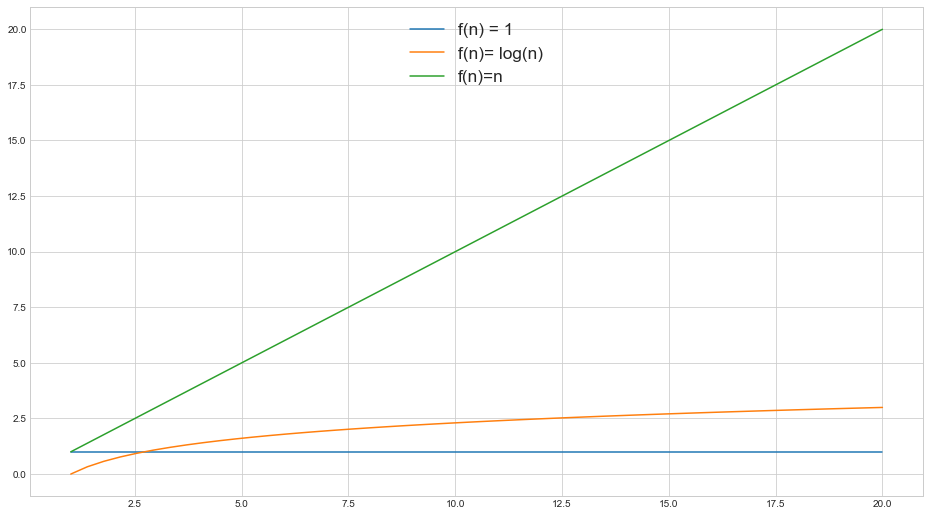

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import log
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))

import numpy as np
x = np.linspace(1, 20, 50)

# First plot a constant function
plt.plot(x, np.ones(50), label="f(n) = 1")

# Then plot log(x)
plt.plot(x, np.log(x), label='f(n)= log(n)')

# Then plot linear growth
plt.plot(x, x, label='f(n)=n')

plt.legend(loc="upper center", fontsize="xx-large")
plt.show()

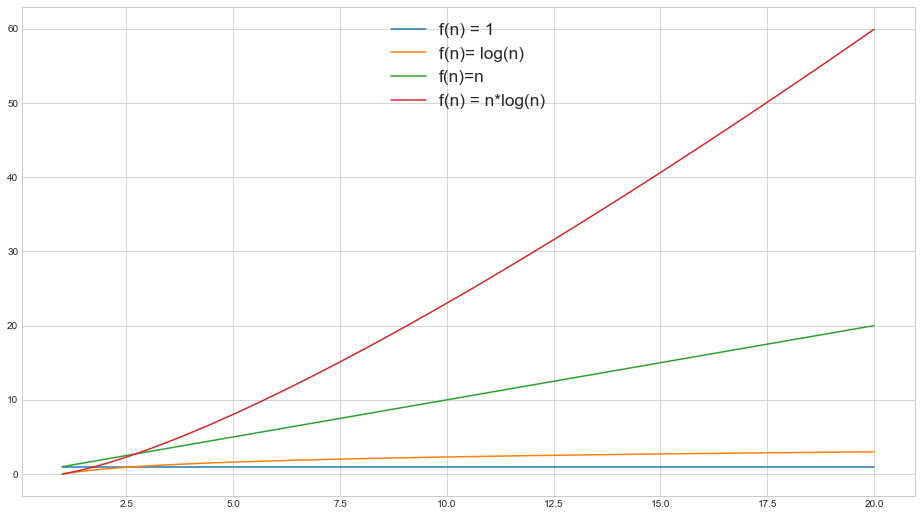

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import log
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))
import numpy as np
x = np.linspace(1, 20, 50)

# First plot a constant function
plt.plot(x, np.ones(50), label="f(n) = 1")

# Then plot log(x)
plt.plot(x, np.log(x), label='f(n)= log(n)')

# Then plot linear growth
plt.plot(x, x, label='f(n)=n')

# Now add n log n growth
plt.plot(x, np.multiply(x, np.log(x)), label="f(n) = n*log(n)")

plt.legend(loc="upper center", fontsize="xx-large")
plt.show()

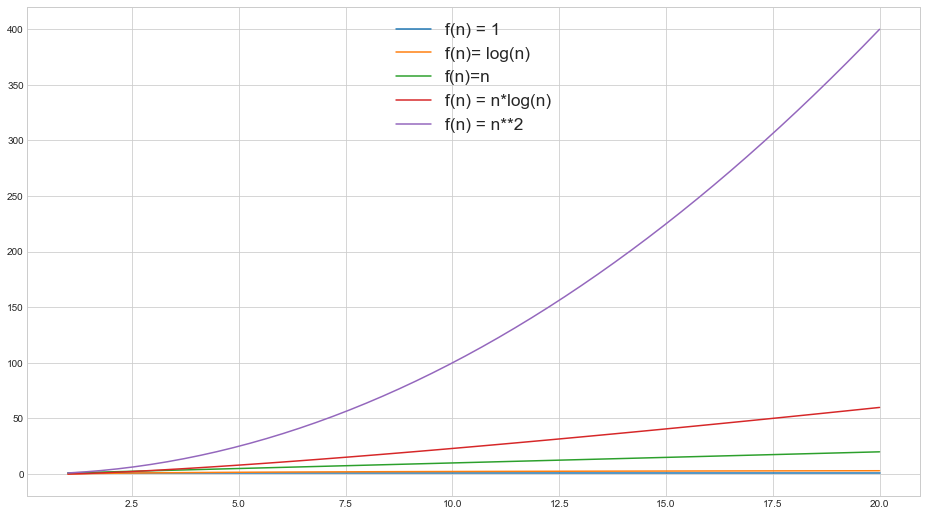

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import log
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))

import numpy as np
x = np.linspace(1, 20, 50)

# First plot a constant function
plt.plot(x, np.ones(50), label="f(n) = 1")

# Then plot log(x)
plt.plot(x, np.log(x), label='f(n)= log(n)')

# Then plot linear growth
plt.plot(x, x, label='f(n)=n')

# Now add n log n growth
plt.plot(x, np.multiply(x, np.log(x)), label="f(n) = n*log(n)")

# Now add n**2 growth
plt.plot(x, np.power(x, 2), label="f(n) = n**2")

plt.legend(loc="upper center", fontsize="xx-large")
plt.show()

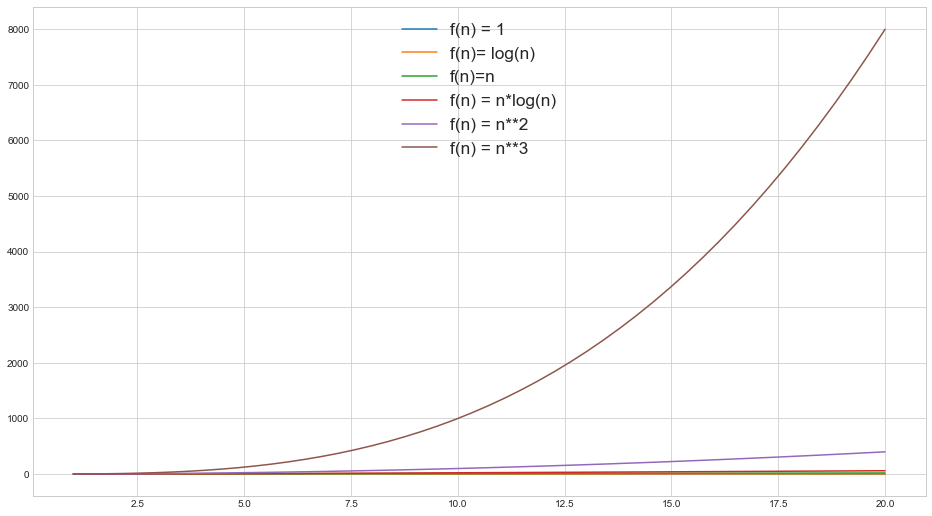

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import log
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16, 9))

import numpy as np
x = np.linspace(1, 20, 50)

# First plot a constant function
plt.plot(x, np.ones(50), label="f(n) = 1")

# Then plot log(x)
plt.plot(x, np.log(x), label='f(n)= log(n)')

# Then plot linear growth
plt.plot(x, x, label='f(n)=n')

# Now add n log n growth
plt.plot(x, np.multiply(x, np.log(x)), label="f(n) = n*log(n)")

# Now add n**2 growth
plt.plot(x, np.power(x, 2), label="f(n) = n**2")


# And now n**3
plt.plot(x, np.power(x, 3), label="f(n) = n**3")

plt.legend(loc="upper center", fontsize="xx-large")
plt.show()

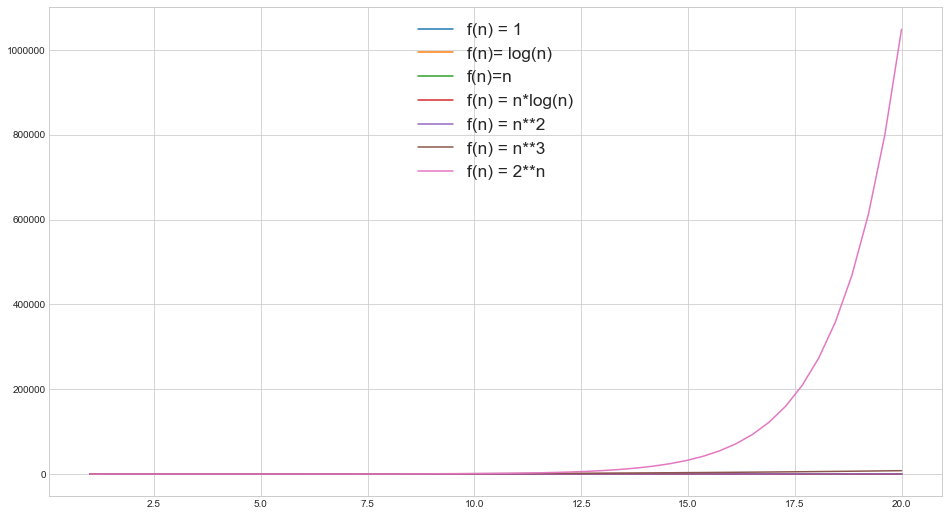

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import log
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))

import numpy as np
x = np.linspace(1, 20, 50)

# First plot a constant function
plt.plot(x, np.ones(50), label="f(n) = 1")

# Then plot log(x)
plt.plot(x, np.log(x), label='f(n)= log(n)')

# Then plot linear growth
plt.plot(x, x, label='f(n)=n')

# Now add n log n growth
plt.plot(x, np.multiply(x, np.log(x)), label="f(n) = n*log(n)")

# Now add n**2 growth
plt.plot(x, np.power(x, 2), label="f(n) = n**2")


# And now n**3
plt.plot(x, np.power(x, 3), label="f(n) = n**3")

# Finally, 2**n
plt.plot(x, np.exp2(x), label="f(n) = 2**n")

plt.legend(loc="upper center", fontsize="xx-large")
plt.show()

<img src="data01/function growth.png" width="800" height="600"/>

<img src="data01/time to compute.png" width="800" height="600"/>

<img src="data01/growth matters.png" width="800" height="600"/>

# Homework

I will be using material from "Algorithms Illuminated" (Part 1 and Part 2).  The books are available on Amazon (https://www.amazon.com/gp/bookseries/B077BMH7HZ) and are well worth the price (the Kindle versions are only $2.99 each).  The author, Tim Roughgarden, has also made a series of Youtube videos from the books that I will reference from time to time.  Before next week you should watch the following videos in the series:

In [ ]:
# Why study algorithms

from IPython.lib.display import YouTubeVideo
YouTubeVideo('yRM3sc57q0c', width=800, height=600)

In [ ]:
# The third-grade integer multiplication algorithm

from IPython.lib.display import YouTubeVideo
YouTubeVideo('6u0Vaj4nn54', width=800, height=600)

In [ ]:
# The surprising Karatsuba multiplication algorithm

from IPython.lib.display import YouTubeVideo
YouTubeVideo('JCbZayFr9RE', width=800, height=600)